# LABS WEEK 4 COMPLETE

## 4.01 Lab | Cleaning numerical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder.

### Context

An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

#### Some business Objectives:

 * Retain customers,
 * Analyze relevant customer data,
 * Develop focused customer retention programs.
 
Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

**1.Import the necessary libraries.**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [60]:
# Cell-to-cell script
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

**2.Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.**

In [61]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

**3. First look at its main features (head, shape, info).**

In [62]:
data.head()
data.shape

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


(9134, 24)

In [63]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [64]:
data.info()
#Data has 24 columns of data and 9134 rows. There are no Nan values. 
#We have numerical( 2 float64 and 6 int64) and 16 columns of categorical data. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [65]:
#checking there is no null values
data.isnull().sum()/len(data)

Customer                         0.0
State                            0.0
Customer Lifetime Value          0.0
Response                         0.0
Coverage                         0.0
Education                        0.0
Effective To Date                0.0
EmploymentStatus                 0.0
Gender                           0.0
Income                           0.0
Location Code                    0.0
Marital Status                   0.0
Monthly Premium Auto             0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Number of Open Complaints        0.0
Number of Policies               0.0
Policy Type                      0.0
Policy                           0.0
Renew Offer Type                 0.0
Sales Channel                    0.0
Total Claim Amount               0.0
Vehicle Class                    0.0
Vehicle Size                     0.0
dtype: float64

**4. Rename the columns so they follow the PE8 (snake case)**

In [66]:
# Dropping the space and lowercase column names
data.columns = data.columns.str.replace(' ', '_').str.lower()
# data.columns = data.columns.str.replace(' ', '_')
# data.columns= data.columns.str.lower()
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


**5. Change effective to date column to datetime format.**

In [67]:
#Transforming  column Effective_to_date into a date time type
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])
data['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [68]:
#Other way
# customer_df["Effective_To_Date"] =  customer_df[["Effective_To_Date"]].apply(pd.to_datetime)


**6. Check NaN values per column.**

In [69]:
#checking there is no null values
data.isnull().sum()/len(data)
#(done some lines before)

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

**7.Define a function that differentiates between continuous and discrete variables.** Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.

In [70]:
# checking number of different values in a column
data.nunique()

customer                         9134
state                               5
customer_lifetime_value          8041
response                            2
coverage                            3
education                           5
effective_to_date                  59
employmentstatus                    5
gender                              2
income                           5694
location_code                       3
marital_status                      3
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
policy_type                         3
policy                              9
renew_offer_type                    4
sales_channel                       4
total_claim_amount               5106
vehicle_class                       6
vehicle_size                        3
dtype: int64

In [71]:
#Splitting between numericals and categoricals variables
numericals = data.select_dtypes(np.number)
categoricals = data.select_dtypes(np.object)

In [72]:
#Only numerical variables can be classified as discrete or continuous
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [73]:
#Only numerical variables can be classified as discrete or continuous
#Let´s check unique values for each feature
numericals.nunique()

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

For the amount of unique values of each column we assume that the **continous variables** are:
   - customer_lifetime_value
   - income
   - total_claim_amount
    
For the rest, we consider there are **discrete variables** (their values could be groped into bins). 
We will treat this discrete variables as categorical. We will transform them later on. 

In [74]:
# #Other way to do instead using the function below.
# X_cat = numericals.loc[:, numericals.nunique() <101]
# X_num =numericals.loc[:, numericals.nunique() >101]

In [75]:
#Defining and applying a function to have a list of discrete and contious variables.
def funtion(x):
    if len(x.value_counts()) < 300: 
        return 'discrete'
    else:
        return 'continuous'
numericals.apply(funtion)
# NOTE: in the next labs we will change <300 t0 <101 so we will not consider 'Monthly Premium Auto' withing the discrete variables.

customer_lifetime_value          continuous
income                           continuous
monthly_premium_auto               discrete
months_since_last_claim            discrete
months_since_policy_inception      discrete
number_of_open_complaints          discrete
number_of_policies                 discrete
total_claim_amount               continuous
dtype: object

In [76]:
# STORING THE CONTINOUS and DISCRETE VARIABLE IN  SEPARATED DATASET
continous= numericals[['customer_lifetime_value','income','total_claim_amount']]
continous
discrete = numericals.drop(['customer_lifetime_value','income','total_claim_amount'], axis=1)
discrete

,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879
...,...,...,...
9129,23405.987980,71941,198.234764
9130,3096.511217,21604,379.200000
9131,8163.890428,0,790.784983
9132,7524.442436,21941,691.200000


,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1
...,...,...,...,...,...
9129,73,18,89,0,2
9130,79,14,28,0,1
9131,85,9,37,3,2
9132,96,34,3,0,3


**8. For the categorical data, check if there is some kind of text in a variable so we would need to clean it.** 
Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

In [77]:
categoricals.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [78]:
# Checking categorials values.
categoricals.nunique()
for x in categoricals:
    categoricals[x].value_counts()

customer            9134
state                  5
response               2
coverage               3
education              5
employmentstatus       5
gender                 2
location_code          3
marital_status         3
policy_type            3
policy                 9
renew_offer_type       4
sales_channel          4
vehicle_class          6
vehicle_size           3
dtype: int64

AB96670    1
EZ48093    1
MZ65087    1
DF71709    1
YC45944    1
          ..
JI25066    1
ZH35315    1
RC61383    1
YU21725    1
VN30344    1
Name: customer, Length: 9134, dtype: int64

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

No     7826
Yes    1308
Name: response, dtype: int64

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

F    4658
M    4476
Name: gender, dtype: int64

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

**Do we have redundant info in the column policy_type and policy? Let´s check the unique values** 

´**policy_type**

- Personal Auto     6788
- Corporate Auto    1968
- Special Auto       378

**policy** 

- Personal L3     3426
- Personal L2     2122
- Personal L1     1240
-- TOTAL PERSONAL: 6788 ( the same unique values as in policy_type) 
- Corporate L3    1014
- Corporate L2     595
- Corporate L1     359
-- TOTAL CORPORATE 1968 ( the same unique values as in policy_type) 
- Special L2       164
- Special L3       148
- Special L1        66
-- TOTAL SPECIAL 378 ( the same unique values as in policy_type) 

We can conclude that policy has the same info as policy type classificating the policies among personal, corporate and special auto. Is true that the column policy adds L1,L2 and L3 to each type but we do not know really the meaning of it.
Thus, we will drop the 'Policy'column and only leave 'policy_type'

In [79]:
# Let´s try to check the above assumption with a function
# Function make 'Policy' column the same as 'Policy_type'

def clean_policy(x):
    if 'Personal'in x:
        return 'Personal'
    elif 'Corporate' in x:
        return 'Corporate'
    else: 
        return 'Special'

In [80]:
categoricals['policy']= categoricals['policy'].apply (clean_policy)
categoricals['policy'].value_counts()
categoricals['policy_type'].value_counts()

C:\Users\Elena\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Personal     6788
Corporate    1968
Special       378
Name: policy, dtype: int64

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [81]:
#we have checked the values are the same as the one we have in policy_type

**9. Get categorical features**

In [82]:
#Let´s drop the column 'policy' from our categorical dataframe
categoricals = categoricals.drop(['policy'], axis=1)
categoricals.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize


**10. What should we do with the customer_id column?**

In [83]:
# Customer_id is data to identify each costumer. It is not meaninful for our analysis. We drop it from our categorical data.
categoricals=categoricals.drop(['customer'],axis=1)
categoricals.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize


## 4.02 Lab | Cleaning categorical data

This is a continuation of Lab 4.01 we are only going to do the question which are not done before.

**11.Plot a correlation matrix, what can you see?**

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


<Figure size 800x320 with 0 Axes>

<AxesSubplot:>

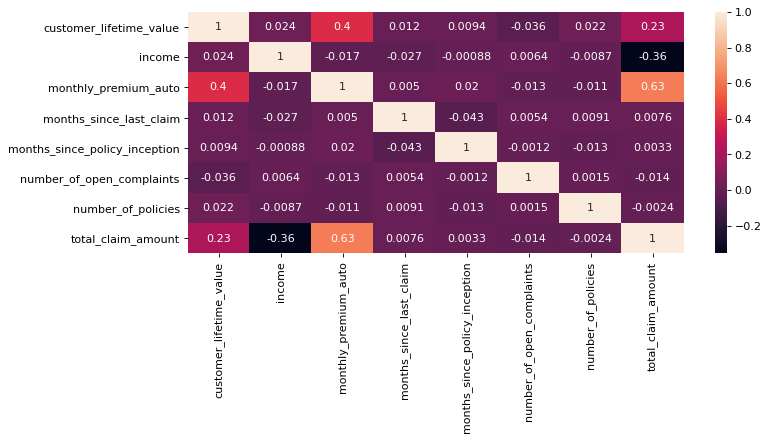

In [84]:
# We create the correlation matrix for the numerical variables
import matplotlib.pyplot as plt
import seaborn as sns

numericals.corr()

plt.figure(figsize=(10,4), dpi=80)
sns.heatmap(numericals.corr(), annot=True)
plt.show()

In [85]:
# There are no high correlation values among the features. 
# The highest value is 0.4 between  monthly_premium_auto and customer_life_time vaule but it does not indicate a extremely high correlation. 
# We find a pretty high corretation between the Total Claim Amount and the Monthly premium value. 
#Total claim value is our target/label value. The one we want to predict.


**12.Create a function to plot every discrete variables. Do the same with continuous variables**(be careful, you may change the plot type to another one better suited for continuous data).

In [86]:
# Creating a function to plot discrete variables
#  ----NOT ABLE TO CREATE A FUNCTION FOR THIS

In [87]:
#PLOTTING DISCRETE VARIABLES
#We will use bar chart for plotting discrete variables

In [88]:
discrete.columns

Index(['monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies'],
      dtype='object')

<AxesSubplot:>

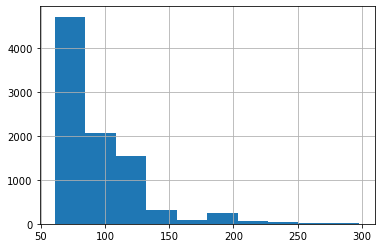

In [89]:
discrete['monthly_premium_auto'].hist()
# displot

<AxesSubplot:>

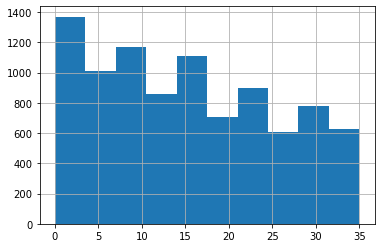

In [90]:
discrete['months_since_last_claim'].hist()

<AxesSubplot:>

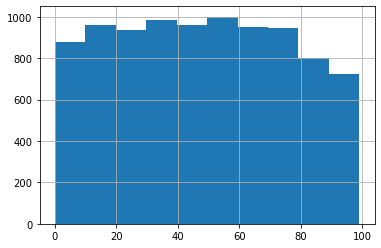

In [91]:
discrete['months_since_policy_inception'].hist()

<AxesSubplot:>

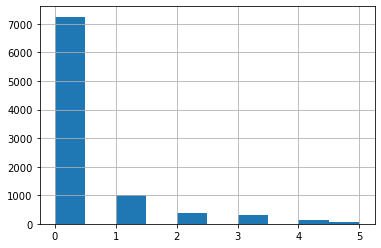

In [92]:
discrete['number_of_open_complaints'].hist()

<AxesSubplot:>

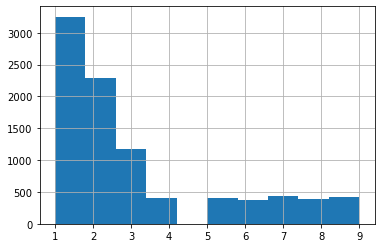

In [93]:
discrete['number_of_policies'].hist()

In [94]:
#PLOTTING CONTINOUS VARIABLES
#We will use bar chart for plotting discrete variables

In [95]:
continous.columns

Index(['customer_lifetime_value', 'income', 'total_claim_amount'], dtype='object')

Text(0.5, 0.98, 'Distribution of continous variables in boxplots')

<AxesSubplot:xlabel='customer_lifetime_value'>

<AxesSubplot:xlabel='income'>

<AxesSubplot:xlabel='total_claim_amount'>

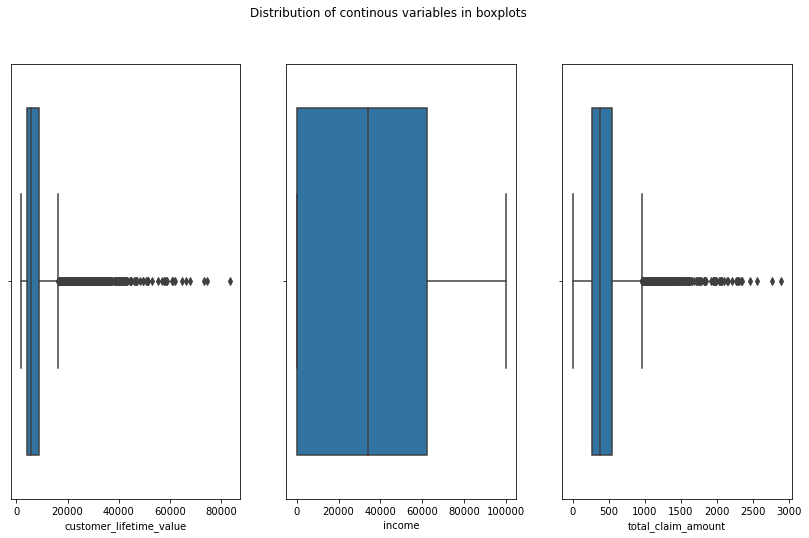

In [96]:
fig, axes = plt.subplots(1, 3, figsize=(14, 8))

fig.suptitle('Distribution of continous variables in boxplots')

sns.boxplot(ax=axes[0],data= continous, x= 'customer_lifetime_value')
sns.boxplot(ax=axes[1],data= continous, x= 'income' )
sns.boxplot(ax=axes[2],data= continous, x= 'total_claim_amount' )

**13. What can you see in the plots?**

In [97]:
# Continous. Customer_liftime_value and Totalclaim_amount seems to be very similar distributed. 
#We find pretty much 'outliers' for this two variables. Not outliers in the income value. 

**14.Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that**

In [98]:
# we have already done this in the code above. 

**15.Have you found outliers? If you have, what should we do with them?**

In [99]:
# it seems to be some outliers values in the 'Customer_life_column and ´Total_claim_amount'. 
#We will check them to decide what to do with these values, but initally 

In [100]:
continous.describe()

,customer_lifetime_value,income,total_claim_amount
count,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,434.088794
std,6870.967608,30379.904734,290.500092
min,1898.007675,0.000000,0.099007
25%,3994.251794,0.000000,272.258244
50%,5780.182197,33889.500000,383.945434
75%,8962.167041,62320.000000,547.514839
max,83325.381190,99981.000000,2893.239678


## 4.03 Lab | Feature extraction

**16.Open the categoricals variable we created before.**

In [101]:
categoricals.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize


**17.Plot all the categorical variables with the proper plot. What can you see?**

In [102]:
categoricals.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

Text(0.5, 0.98, 'Distribution of categorical variables in countplots')

<AxesSubplot:xlabel='state', ylabel='count'>

<AxesSubplot:xlabel='response', ylabel='count'>

<AxesSubplot:xlabel='coverage', ylabel='count'>

<AxesSubplot:xlabel='education', ylabel='count'>

<AxesSubplot:xlabel='employmentstatus', ylabel='count'>

<AxesSubplot:xlabel='gender', ylabel='count'>

<AxesSubplot:xlabel='location_code', ylabel='count'>

<AxesSubplot:xlabel='marital_status', ylabel='count'>

<AxesSubplot:xlabel='policy_type', ylabel='count'>

<AxesSubplot:xlabel='renew_offer_type', ylabel='count'>

<AxesSubplot:xlabel='sales_channel', ylabel='count'>

<AxesSubplot:xlabel='vehicle_class', ylabel='count'>

<AxesSubplot:xlabel='vehicle_size', ylabel='count'>

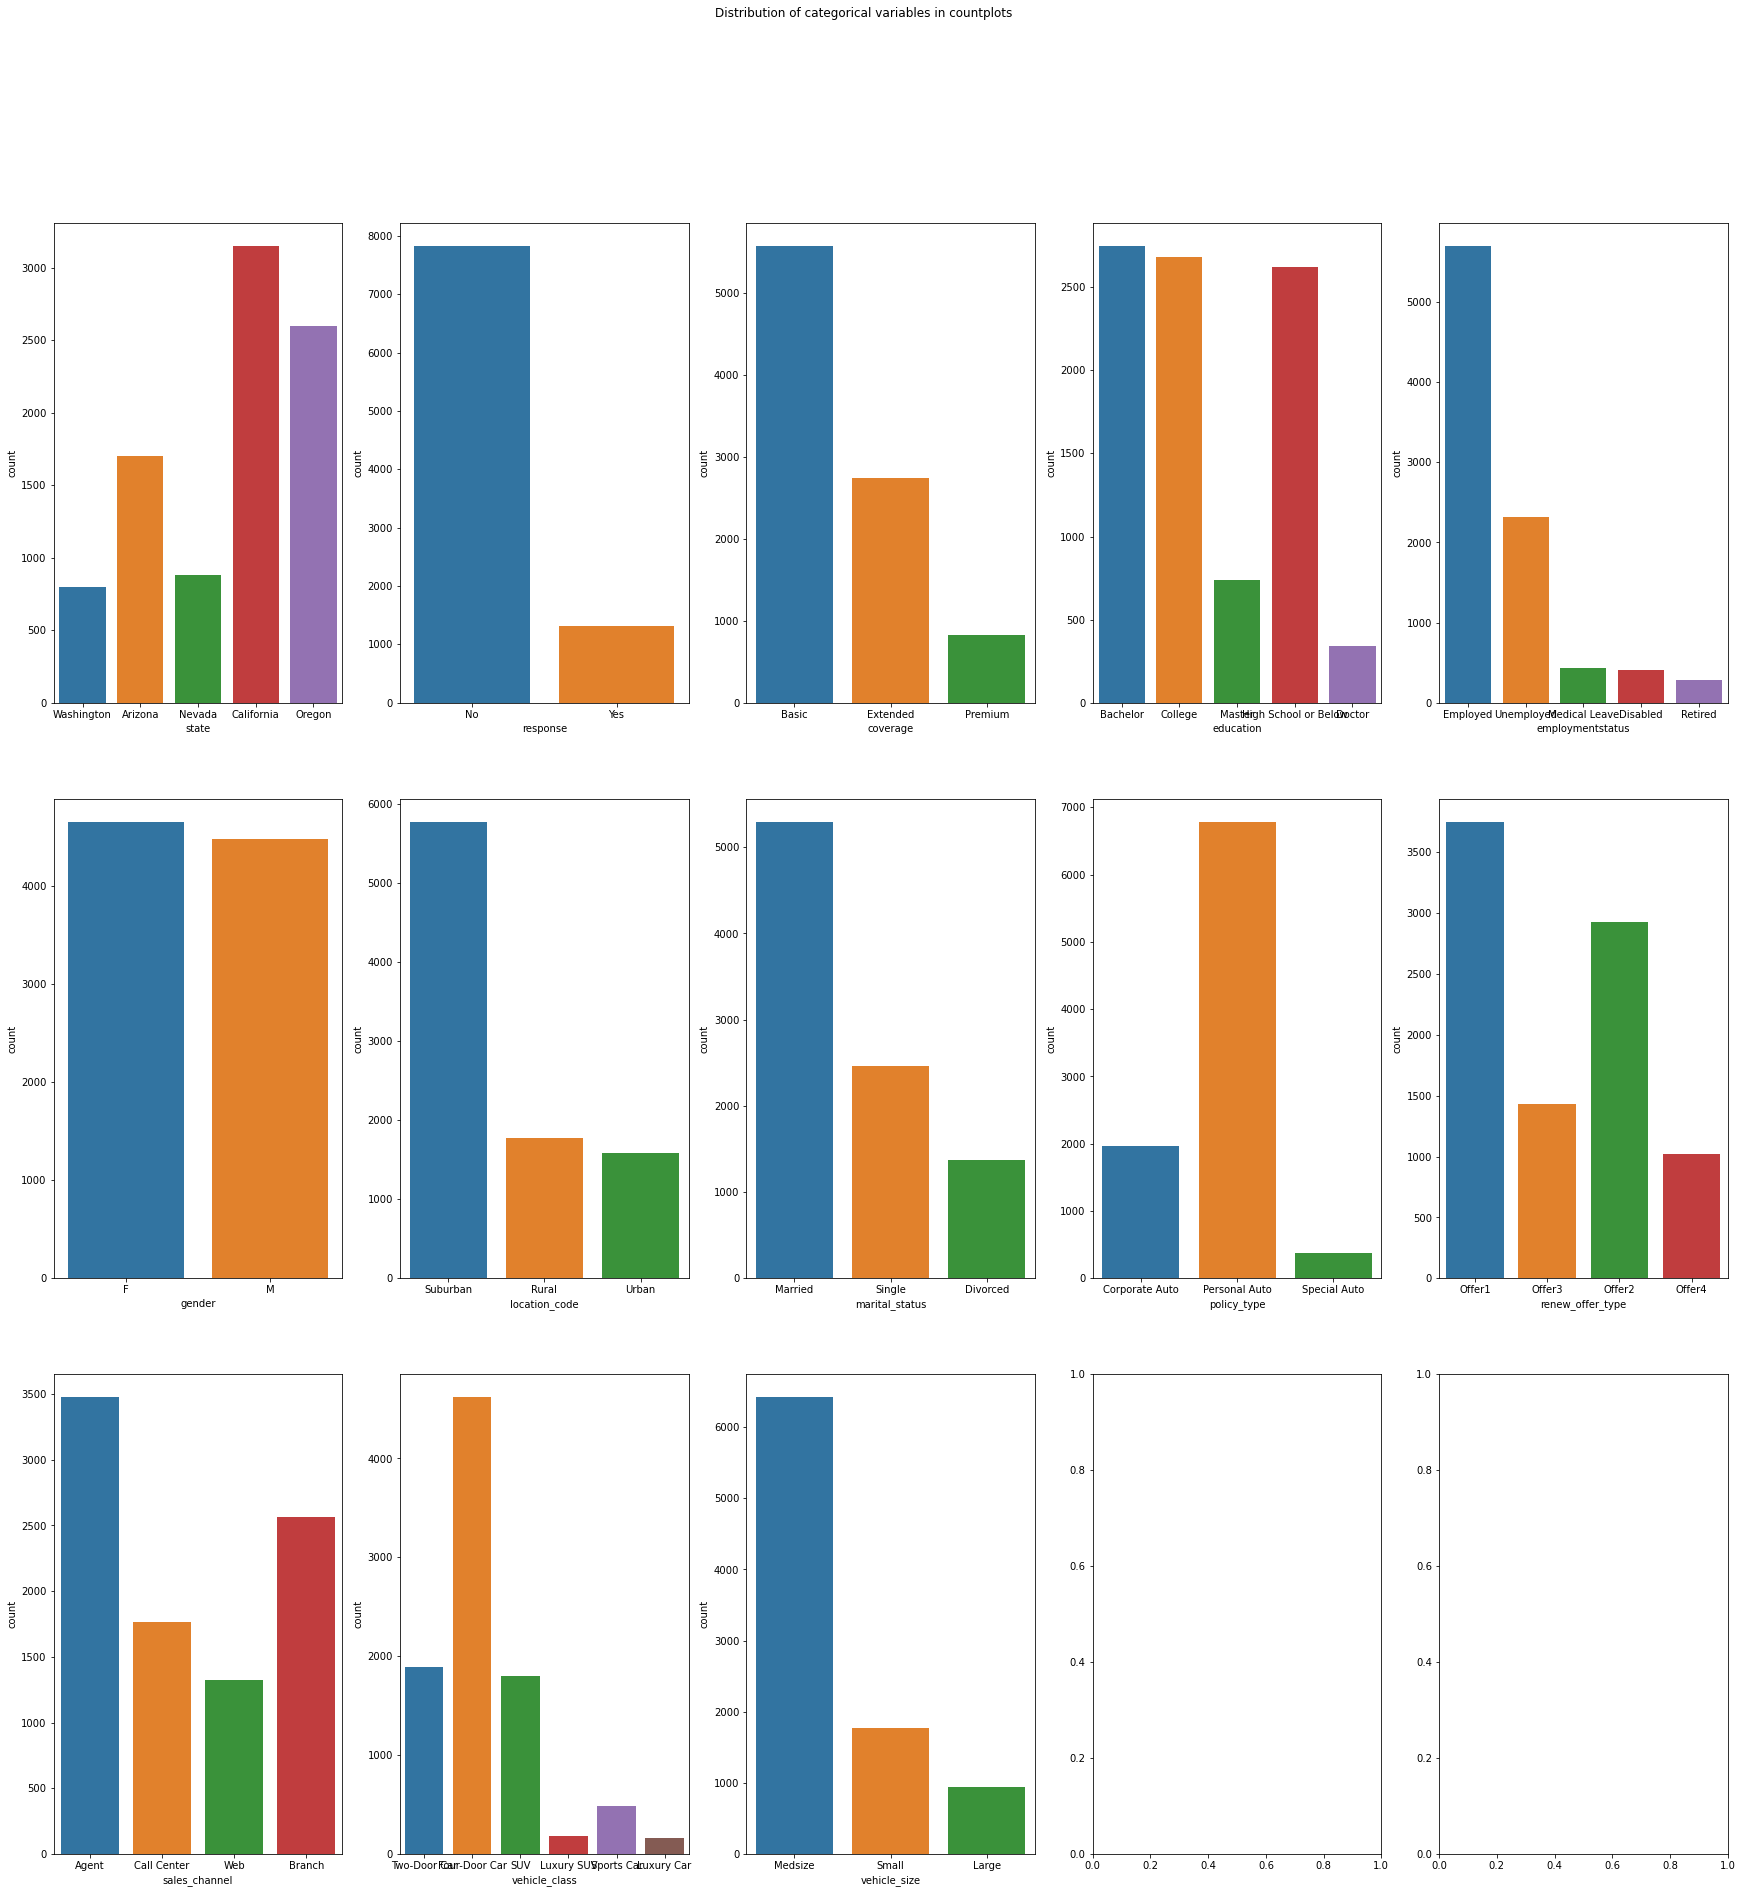

In [104]:
fig, axes = plt.subplots(3,5,  figsize=(30, 30))

fig.suptitle('Distribution of categorical variables in countplots')

sns.countplot(ax=axes[0,0],data= categoricals, x= 'state' )
sns.countplot(ax=axes[0,1],data= categoricals, x= 'response' )
sns.countplot(ax=axes[0,2],data= categoricals, x= 'coverage')
sns.countplot(ax=axes[0,3],data= categoricals, x= 'education')
sns.countplot(ax=axes[0,4],data= categoricals, x= 'employmentstatus')
sns.countplot(ax=axes[1,0],data= categoricals, x= 'gender')
sns.countplot(ax=axes[1,1],data= categoricals, x= 'location_code')
sns.countplot(ax=axes[1,2],data= categoricals, x= 'marital_status')
sns.countplot(ax=axes[1,3],data= categoricals, x= 'policy_type')
sns.countplot(ax=axes[1,4],data= categoricals, x= 'renew_offer_type')
sns.countplot(ax=axes[2,0],data= categoricals, x= 'sales_channel')
sns.countplot(ax=axes[2,1],data= categoricals, x= 'vehicle_class')
sns.countplot(ax=axes[2,2],data= categoricals, x= 'vehicle_size')

**18.There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?**

In [ ]:
#We find redundancy between 'Policy' and 'Policy_type'.
#We have already deal with this previously ( we only keep the policy_type column in our categorical data frame)

**19.Plot time variable. Can you extract something from it?**

In [105]:
data['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

<Figure size 1080x288 with 0 Axes>

<AxesSubplot:xlabel='effective_to_date', ylabel='total_claim_amount'>

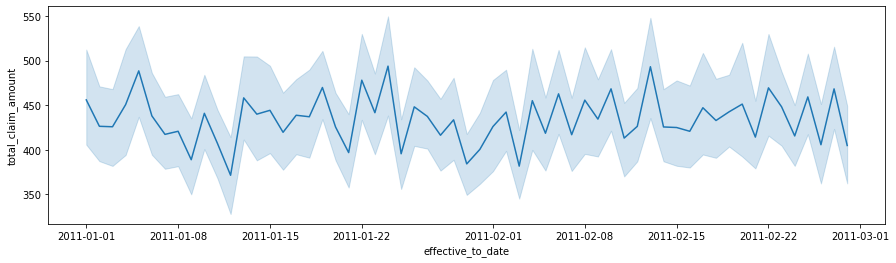

In [127]:
plt.figure(figsize=(15,4))
sns.lineplot(data=data, x="effective_to_date", y='total_claim_amount',markers=True)

# plt.figure(figsize=(15,4))
# sns.histplot(data=data, x="effective_to_date")